Enter image path:  blue.jpg


Original image:


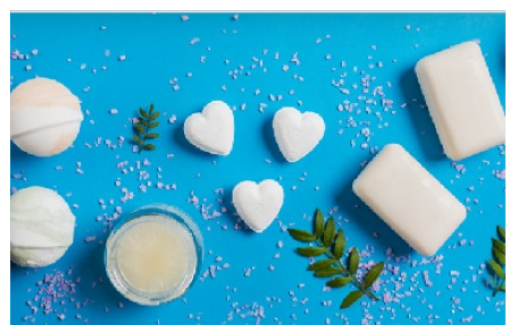

Sharpened image:


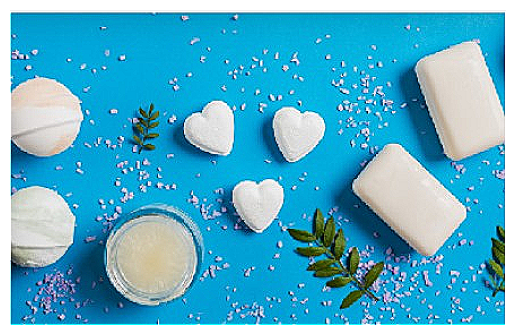

Blurred image:


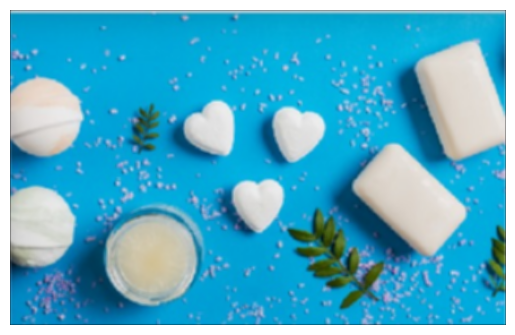

edges:


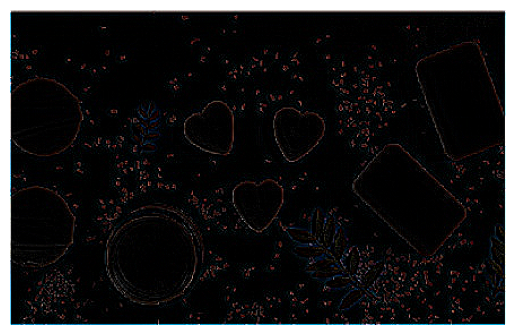

In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def show_rgb(image):
    image_rgb = cv2.cvtColor(image.astype(np.uint8), cv2.COLOR_BGR2RGB)
    plt.imshow(image_rgb)
    plt.axis('off')
    plt.show()

def convolve(image, kernel):
    
    # Handle both grayscale and color images
    if len(image.shape) == 2:  # Grayscale image
        image = image[:, :, np.newaxis]
    
    image_height, image_width, image_channels = image.shape
    kernel_height, kernel_width = kernel.shape

    # Initialize the output matrix
    output = np.zeros_like(image, dtype=float)

    # Calculate the padding size for height and width
    pad_height = kernel_height // 2
    pad_width = kernel_width // 2

    # Pad the image with zeros on all sides for each channel
    padded_image = np.pad(image, ((pad_height, pad_height), (pad_width, pad_width), (0, 0)), mode='constant', constant_values=0)

    # Perform the convolution operation
    for channel in range(image_channels):
        for i in range(image_height):
            for j in range(image_width):
                # Extract the region of interest for each channel
                region = padded_image[i:i + kernel_height, j:j + kernel_width, channel]

                # Perform element-wise multiplication and sum the results
                conv_value = np.sum(region * kernel)

                # Store the result in the output matrix for the current channel
                output[i, j, channel] = conv_value

    return np.clip(output, 0, 255).astype(np.uint8)

def sharp(image):
    kernel = np.array([[ 0, -1,  0],
                       [-1,  5, -1],
                       [ 0, -1,  0]])
    sharp_img = convolve(image, kernel)
    show_rgb(sharp_img)

def blur(image):
    kernel = np.array([[1, 1, 1],
                       [1, 1, 1],
                       [1, 1, 1]]) / 9
    blur_img = convolve(image, kernel)
    show_rgb(blur_img)
def edge(image):
    kernel = np.array([[0, -1, 0],
                             [-1, 4, -1],
                             [0, -1, 0]])
    edge_img = convolve(image, kernel)
    show_rgb(edge_img)

path = input('Enter image path: ')
image = cv2.imread(path)

print('Original image:')
show_rgb(image)
print('Sharpened image:')
sharp(image)
print('Blurred image:')
blur(image)
print('edges:')
edge(image)